### Jean-Luc Tonan Samuel Ahoyo
#### Roll Number: 2000250059


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [6]:
data = df.copy()

In [7]:
data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [8]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [9]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


<Axes: >

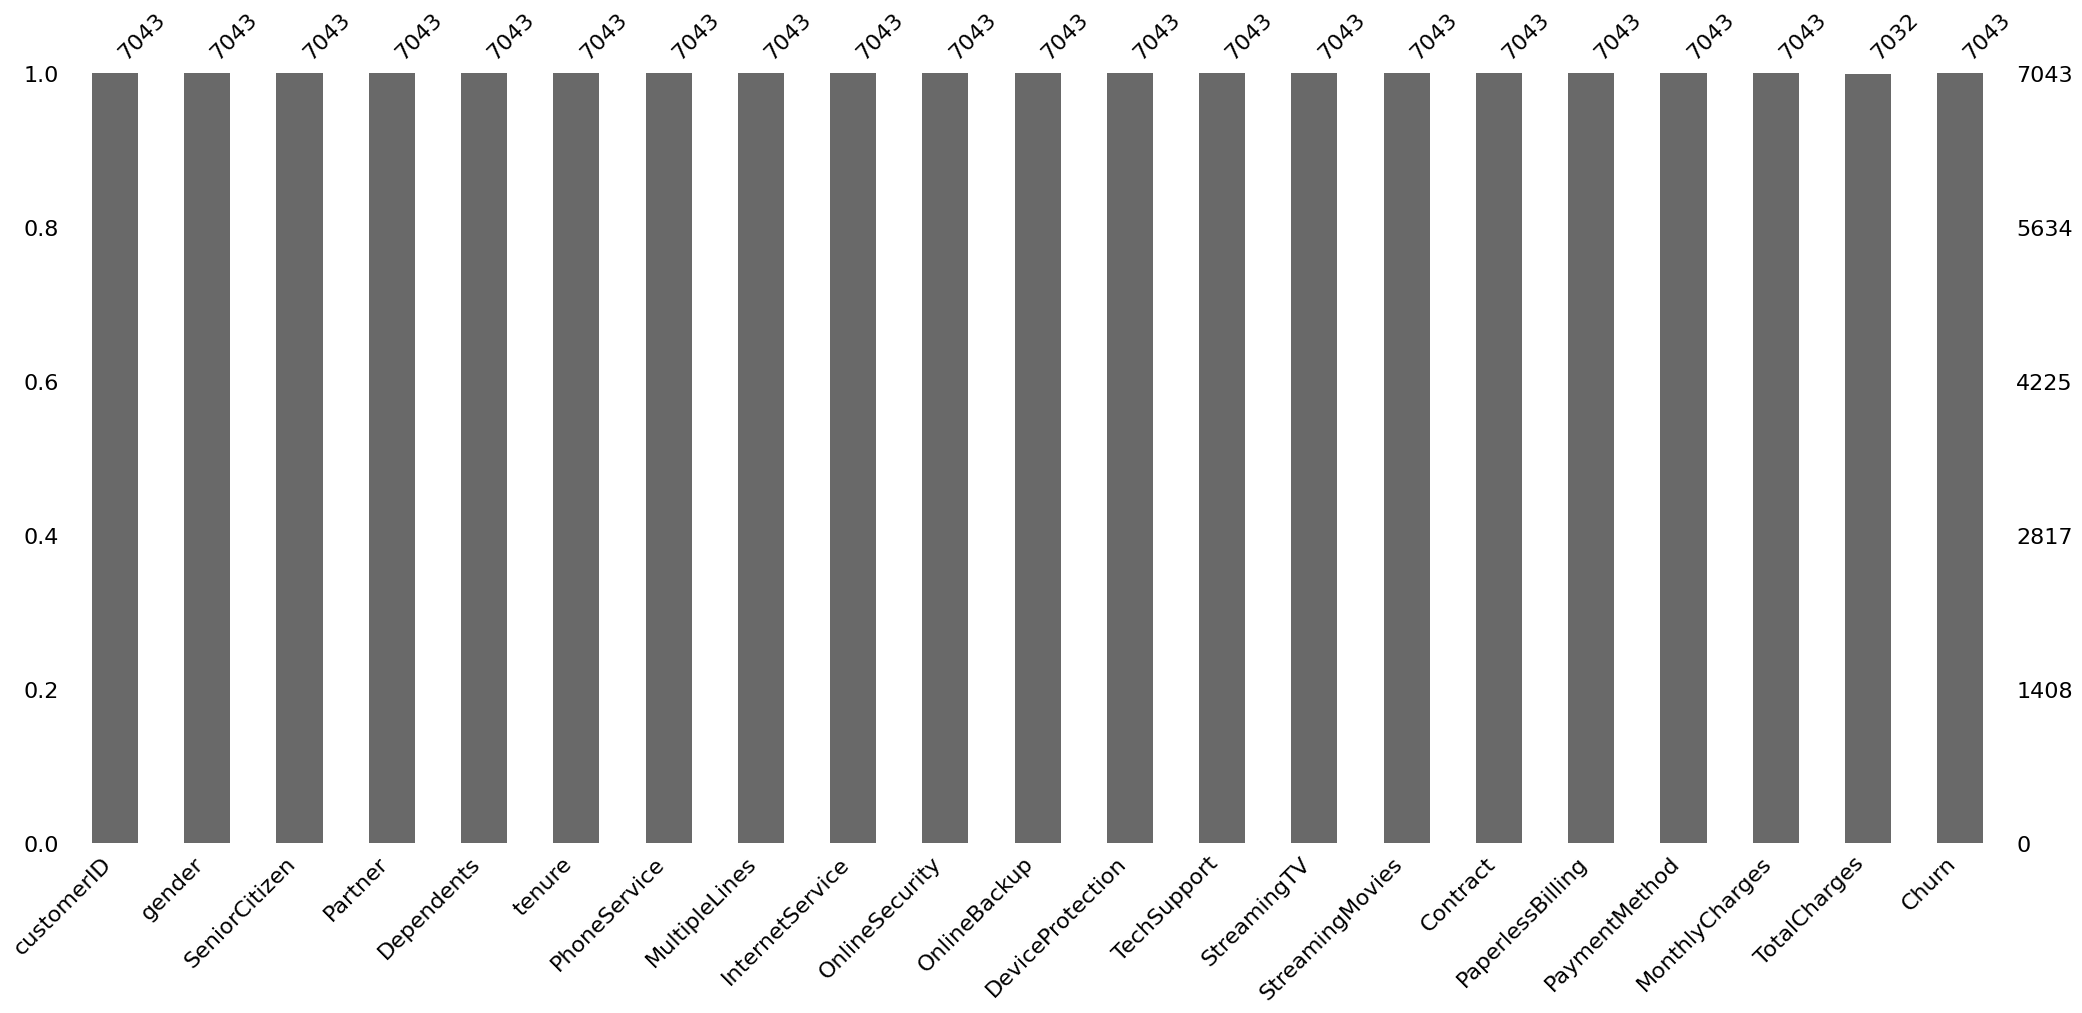

In [10]:
msno.bar(data)

In [11]:
data = data.dropna(subset=["TotalCharges"]).copy()

data["SeniorCitizen"]= data["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [12]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols = [
    'gender','SeniorCitizen','Partner','Dependents','PhoneService',
    'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
    'Contract','PaperlessBilling','PaymentMethod'
]

In [13]:
data[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# Visualizations

## Churn Distribution

In [14]:
data['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


Churn
No     73.42
Yes    26.58
Name: proportion, dtype: float64


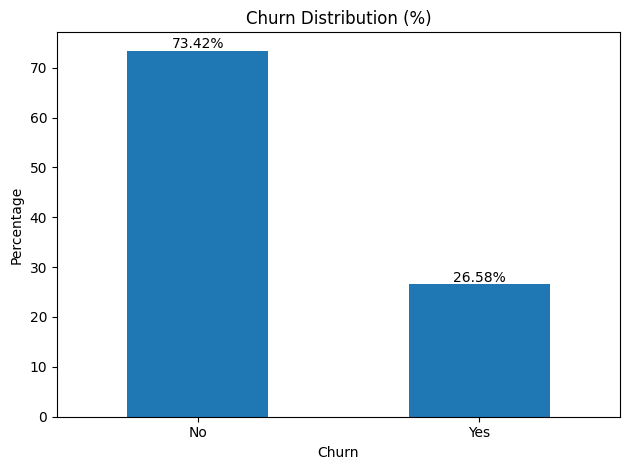

In [15]:
# Calculate percentages
churn_percent = (data['Churn'].value_counts(normalize=True) * 100).round(2)
print(churn_percent)

# Plot
ax = churn_percent.plot(kind='bar')

plt.ylabel('Percentage')
plt.title('Churn Distribution (%)')
plt.xticks(rotation=0)

# Add percentage labels on top of bars
for i, v in enumerate(churn_percent):
    ax.text(i, v + 0.5, f"{v}%", ha='center')

plt.tight_layout()
plt.savefig("/content/churn_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

The distribution of the target variable indicates that approximately 73% of customers remained with the service provider, while 27% discontinued their service. This suggests the presence of moderate class imbalance, as non-churning customers substantially outnumber churners.

### Summary statistics

In [16]:
data[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


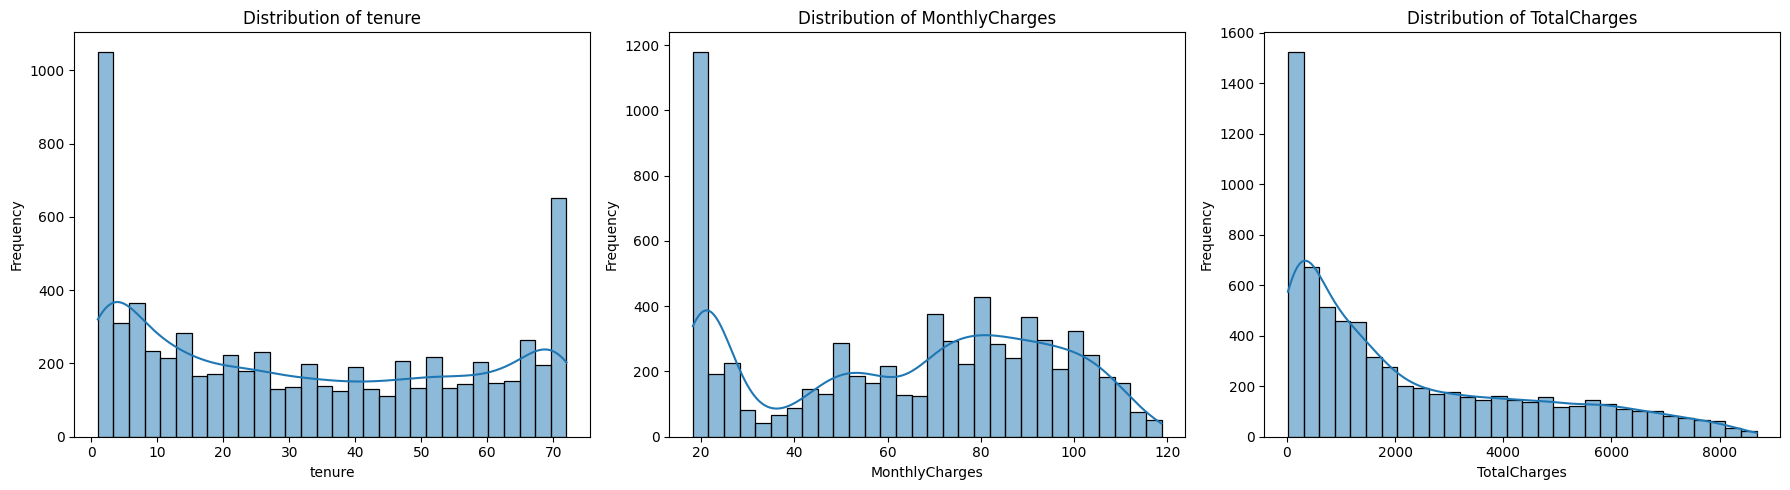

In [17]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(num_cols):
    sns.histplot(
        data[col].dropna(),
        bins=30,
        kde=True,          # <-- This adds the smooth line
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()

# Save as one figure
plt.savefig("/content/numerical_distributions.png", dpi=300, bbox_inches='tight')

plt.show()

Churn x numerical variables

<Figure size 600x500 with 0 Axes>

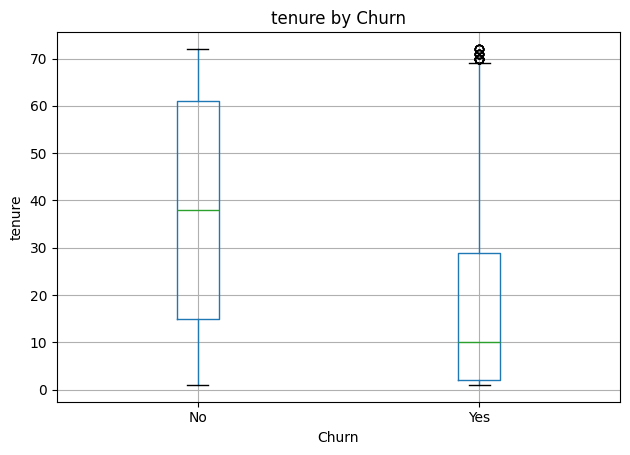

<Figure size 600x500 with 0 Axes>

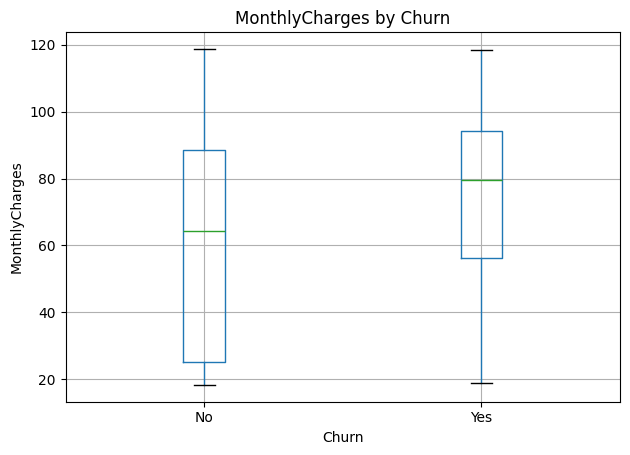

In [18]:
# for col in num_cols:
#     plt.figure()
#     data.boxplot(column=col, by='Churn')
#     plt.title(f"{col} by Churn")
#     plt.suptitle("")
#     plt.xlabel("Churn")
#     plt.ylabel(col)
#     plt.show()

cols_to_save = ['tenure', 'MonthlyCharges']

for col in cols_to_save:
    plt.figure(figsize=(6,5))
    data.boxplot(column=col, by='Churn')

    plt.title(f"{col} by Churn")
    plt.suptitle("")  # remove automatic pandas title
    plt.xlabel("Churn")
    plt.ylabel(col)

    plt.tight_layout()
    plt.savefig(f"{col}_by_churn_boxplot.png", dpi=300, bbox_inches='tight')
    plt.show()

## Interpretation

Customers who churn tend to have shorter tenure compared to retained customers, suggesting that customer attrition is more common among recently acquired subscribers. Additionally, higher monthly charges appear associated with increased churn probability, indicating that pricing may influence customer retention.

Churn x Categorical features

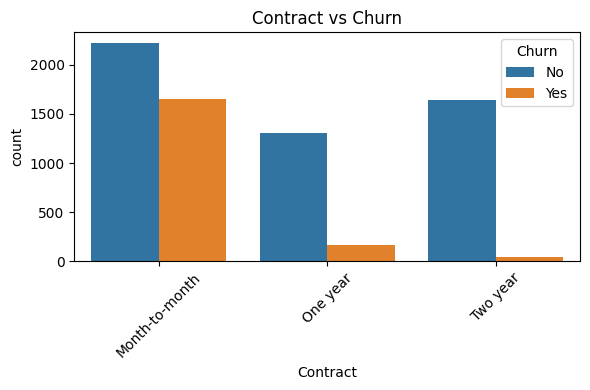

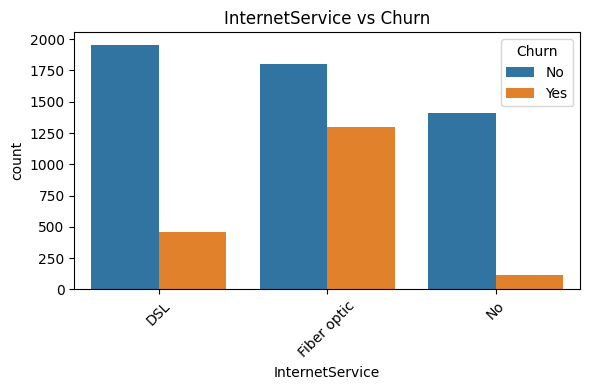

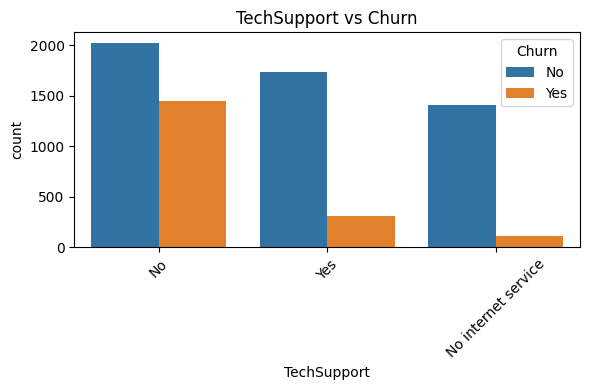

In [19]:
cat_ = ['gender','Contract','PaymentMethod', 'InternetService','TechSupport','SeniorCitizen']
cat_save = ['Contract','InternetService','TechSupport']

for col in cat_save:
    plt.figure(figsize=(6,4))
    sns.countplot(data=data, x=col, hue='Churn')
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{col}_by_churn_countplot.png", dpi=300, bbox_inches='tight')
    plt.show()

## Interpretation
Exploratory analysis of categorical variables indicates that contract type and technical support availability exhibit the strongest associations with customer churn. Customers on month-to-month contracts and those lacking technical support show higher churn tendencies. Payment method and internet service type also demonstrate moderate relationships with churn, whereas demographic factors such as gender appear to have limited influence on customer attrition.

# Normality Testing



## Shapiro–Wilk test

In [20]:
for col in num_cols:
    x = data[col].dropna()
    x_sample = x.sample(n=min(len(x), 5000), random_state=42)

    stat, p = stats.shapiro(x_sample)
    print(f"{col:15s} | Shapiro-Wilk stat={stat:.4f} | p-value={p:.6f}")

tenure          | Shapiro-Wilk stat=0.9034 | p-value=0.000000
MonthlyCharges  | Shapiro-Wilk stat=0.9221 | p-value=0.000000
TotalCharges    | Shapiro-Wilk stat=0.8622 | p-value=0.000000


### Interpretation
Normality tests were conducted on the continuous variables tenure, MonthlyCharges, and TotalCharges using the Shapiro-Wilk test. The results indicated statistically significant deviations from normality for all variables (p < 0.001). This suggests that the distributions of these variables are not normally distributed.

## Q-Q Plots and P-P plots

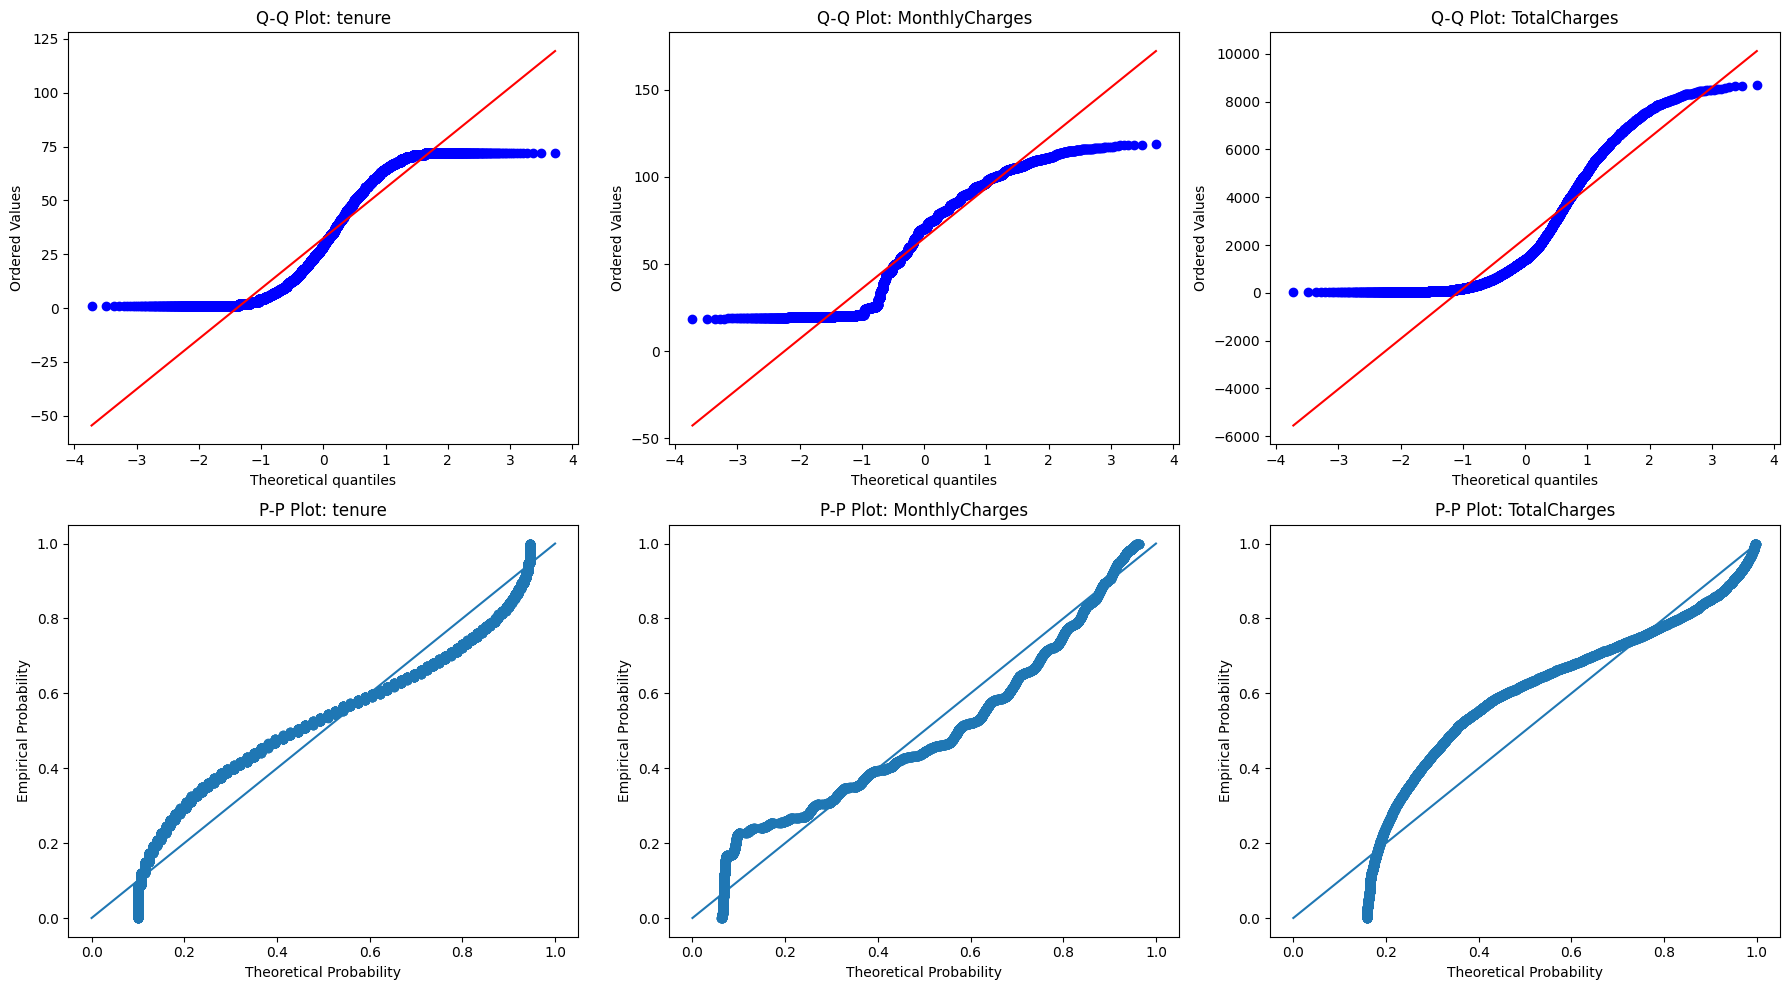

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(num_cols):

    values = data[col].dropna()

    # --------------------
    # Q-Q Plot (Top Row)
    # --------------------
    stats.probplot(values, dist="norm", plot=axes[0, i])
    axes[0, i].set_title(f"Q-Q Plot: {col}")

    # --------------------
    # P-P Plot (Bottom Row)
    # --------------------
    values = np.asarray(values)
    values_sorted = np.sort(values)
    n = len(values_sorted)

    empirical = np.arange(1, n+1) / n

    mu, sigma = np.mean(values_sorted), np.std(values_sorted, ddof=1)
    theoretical = stats.norm.cdf(values_sorted, loc=mu, scale=sigma)

    axes[1, i].scatter(theoretical, empirical)
    axes[1, i].plot([0, 1], [0, 1])
    axes[1, i].set_title(f"P-P Plot: {col}")
    axes[1, i].set_xlabel("Theoretical Probability")
    axes[1, i].set_ylabel("Empirical Probability")

plt.tight_layout()

# Save single figure
plt.savefig("normality_plots_all.png", dpi=300, bbox_inches='tight')

plt.show()

### Interpretation
Q-Q and P-P plots were generated to visually assess the normality of continuous variables. The plots indicated noticeable deviations from the diagonal reference line for tenure, MonthlyCharges, and TotalCharges, confirming non-normal distributions. These findings are consistent with the Shapiro-Wilk test results and reflect the skewed nature of customer behavioral and financial data in telecommunications datasets.

In [22]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Idependents and Target split

In [23]:
# Target variable
y = data["Churn"].map({"No":0, "Yes":1})

# Drop ID + target
X = data.drop(columns=["customerID","Churn"])

Data encoding and model training pipeline - save best model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# 1) Prepare dataset
df2 = df.copy()
df2 = df2.drop("customerID", axis=1)

# Convert target to 0/1
df2["Churn"] = df2["Churn"].map({"No": 0, "Yes": 1})

# Convert TotalCharges to numeric if needed
df2["TotalCharges"] = pd.to_numeric(df2["TotalCharges"], errors="coerce")
df2 = df2.dropna(subset=["TotalCharges"])  # since you chose to drop missing

# 2) Define X and y
X = df2.drop("Churn", axis=1)
y = df2["Churn"]

# 3) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4) Feature groups
numeric_features = ["tenure", "MonthlyCharges", "TotalCharges"]
categorical_features = [
    "Contract", "InternetService", "PaymentMethod", "TechSupport",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "StreamingTV", "StreamingMovies", "PaperlessBilling",
    "Partner", "Dependents", "gender"
]

# 5) Preprocessor + model pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

# 6) Train and save
pipeline.fit(X_train, y_train)
joblib.dump(pipeline, "churn_pipeline.pkl")

print("Saved churn_pipeline.pkl")

Saved churn_pipeline.pkl


### One hot encoding -- categorical features

In [ ]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded.shape

In [ ]:
X_encoded.head()

In [ ]:
X_encoded.columns

In [ ]:
X_encoded.shape

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif

# Random Forest importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
rf_importances = rf_importances.sort_values(ascending=True)

# Mutual Information
mi_scores = mutual_info_classif(X_train, y_train, discrete_features='auto', random_state=42)
mi_scores = pd.Series(mi_scores, index=X_train.columns)
mi_scores = mi_scores.sort_values(ascending=True)


# Combined ranking
rf_rank = rf_importances.rank(ascending=False)
mi_rank = mi_scores.rank(ascending=False)
print("Random Forest Importance:", rf_rank)
print("Mutual Information:", mi_rank)

combined_rank = (rf_rank + mi_rank) / 2
combined_rank = combined_rank.sort_values()

top_features = combined_rank.head(20).index.tolist()

print("Here are the top 20 features:", top_features)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,12))

# Random Forest importance
rf_importances.plot(kind='barh', color='lightgreen', ax=axes[0])
axes[0].set_title("Random Forest Importance")
axes[0].set_xlabel("Importance")

# Mutual Information
mi_scores.plot(kind='barh', color='skyblue', ax=axes[1])
axes[1].set_title("Mutual Information")
axes[1].set_xlabel("MI Score")

# Highlight final top 20 features
combined_rank.plot(kind='barh', color=['red' if f in top_features else 'gray' for f in combined_rank.index], ax=axes[2])
axes[2].set_title("Combined Rank (Top 20 in Red)")
axes[2].set_xlabel("Average Rank")

plt.tight_layout()
plt.savefig("Feature_Importance.png", dpi=300, bbox_inches='tight')
plt.show()
# save plots

In [ ]:
len(top_features)

### Models training and evaluation on selected top features




In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.utils.class_weight import compute_sample_weight

# Select top features
X_train_sel = X_train[top_features]
X_test_sel = X_test[top_features]

# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sel)
X_test_scaled = scaler.transform(X_test_sel)

# Initialize models
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Compute sample weights for Gradient Boosting
sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n========== {name} ==========")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_true, y_pred):.4f}")


# -----------------------
# Logistic Regression
# -----------------------
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
evaluate_model("Logistic Regression", y_test, y_pred_lr)


# -----------------------
# Random Forest
# -----------------------
rf.fit(X_train_sel, y_train)
y_pred_rf = rf.predict(X_test_sel)
evaluate_model("Random Forest", y_test, y_pred_rf)


# -----------------------
# Gradient Boosting
# -----------------------
gb.fit(X_train_sel, y_train, sample_weight=sample_weights)
y_pred_gb = gb.predict(X_test_sel)
evaluate_model("Gradient Boosting", y_test, y_pred_gb)
y_prob = gb.predict_proba(X_test_sel)[:, 1]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

models = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb
}

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    sns.heatmap(
        cm,
        annot=[[f"TN\n{tn}", f"FP\n{fp}"], [f"FN\n{fn}", f"TP\n{tp}"]],
        fmt='',
        cmap='Blues',
        cbar=False,
        ax=ax
    )

    ax.set_title(name, fontsize=14)
    ax.set_xlabel("Predicted", fontsize=12)
    ax.set_ylabel("Actual", fontsize=12)
    ax.set_xticklabels(["No Churn", "Churn"], rotation=0)
    ax.set_yticklabels(["No Churn", "Churn"], rotation=0)

plt.suptitle("Confusion Matrices for Churn Prediction Models", fontsize=16, y=1.05)
plt.tight_layout()
plt.savefig("Confusion_matrix_models.png", dpi=300, bbox_inches='tight')

plt.show()
# save plots

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Logistic Regression (scaled features)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Random Forest
y_prob_rf = rf.predict_proba(X_test_sel)[:, 1]

# Gradient Boosting
y_prob_gb = gb.predict_proba(X_test_sel)[:, 1]

plt.figure(figsize=(8,6))

for name, y_prob in [
    ("Logistic Regression", y_prob_lr),
    ("Random Forest", y_prob_rf),
    ("Gradient Boosting", y_prob_gb)
]:
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    ap = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f"{name} (AP = {ap:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Telco Churn")
plt.legend()
plt.tight_layout()
plt.savefig("PR-Curve.png", dpi=300, bbox_inches='tight')
plt.show()

## Interpretations

### Logistic Regression (LR)

Performance: Balanced overall; moderate recall (57%) and decent precision (65%).

Strengths: Predicts non-churners/patients accurately, interpretable model, stable across feature selection.

Weakness: Misses a significant portion of positive cases (FN = 160) → in medical diagnosis, this would mean many sick patients go undetected, which is critical.

### Random Forest (RF)

Performance: Lower accuracy (~77%) and poor recall (47%).

Strengths: Fair precision (~60%).

Weakness: Worst for detecting positive cases; misses more than half (FN = 199) → unacceptable in high-stakes scenarios like medicine.

### Gradient Boosting (GB)

Performance: Highest recall (~81%), F1 = 0.626.

Strengths: Catches most positive cases (TP = 304) → minimizes undetected patients, critical in medical diagnosis.

Weakness: Lower precision (~51%) → more false positives (FP = 294).

Interpretation: Acceptable trade-off: in medicine, it’s better to flag a healthy patient as sick (FP) than miss a sick patient (FN).

## Average Precision (AP) Comparison

Gradient Boosting (AP = 0.654) → Best overall discrimination

Logistic Regression (AP = 0.621) → Competitive and stable

Random Forest (AP = 0.598) → Weakest performance

Higher AP indicates better ability to maintain precision as recall increases.

9. Discussion, Summary, Conclusion, and Recommendation
Discussion

This study aimed to predict customer churn using the Telco Churn dataset (7,043 observations, 21 raw features), which after one-hot encoding and feature engineering resulted in 30 features. Feature selection combined Random Forest feature importance and Mutual Information, reducing the model input to the top 20 most informative features.

Three supervised classification models were implemented: Logistic Regression (LR), Random Forest (RF), and Gradient Boosting (GB). Their performance was evaluated using accuracy, precision, recall, F1-score, confusion matrices, and Average Precision (AP) curves.

Model Performance with Top 20 Features:

Logistic Regression

Accuracy: 80.45%, Precision: 65.05%, Recall: 57.22%, F1: 60.88%

Confusion Matrix shows 214 true positives (correctly predicted churners) and 160 false negatives (missed churners).

Logistic Regression is stable and interpretable, providing good precision. However, it misses nearly 43% of churners, which is suboptimal in a revenue-critical scenario.

Random Forest

Accuracy: 77.40%, Precision: 59.52%, Recall: 46.79%, F1: 52.40%

Confusion Matrix indicates it misses over half of the churners (199 FN).

RF demonstrates the lowest recall among the three models, making it the least effective for churn detection despite reasonable accuracy.

Gradient Boosting

Accuracy: 74.13%, Precision: 50.84%, Recall: 81.28%, F1: 62.55%

Confusion Matrix shows 304 true positives and only 70 false negatives, capturing the majority of churners.

Average Precision (AP = 0.654) indicates that GB maintains relatively good precision even as recall increases.

Although precision is lower and overall accuracy slightly reduced, the high recall aligns with the primary business goal: minimizing missed churners to prevent revenue loss.

Interpretation of Metrics for Churn Prediction:

Recall is the most critical metric because the cost of missing a churner (false negative) directly impacts revenue.

Precision is secondary; false positives (predicting churn for a non-churner) are less costly because retention campaigns targeting these customers do not lead to revenue loss.

F1-score provides a balanced view but recall dominates the decision-making in this scenario.

| Model               | Accuracy | Precision | Recall | F1 Score | Strengths                                                  | Weaknesses                                  |
| ------------------- | -------- | --------- | ------ | -------- | ---------------------------------------------------------- | ------------------------------------------- |
| Logistic Regression | 0.8045   | 0.6505    | 0.5722 | 0.6088   | Interpretable, stable, good precision                      | Misses many churners (FN = 160)             |
| Random Forest       | 0.7740   | 0.5952    | 0.4679 | 0.5240   | Easy to implement                                          | Low recall, misses most churners (FN = 199) |
| Gradient Boosting   | 0.7413   | 0.5084    | 0.8128 | 0.6255   | **Highest recall**, best for catching churners, F1 highest | Lower precision, slightly lower accuracy    |


Key Insight:

Gradient Boosting is the most suitable model for customer churn prediction in this dataset, as it prioritizes recall and captures most churners, fulfilling the main business goal.

Conclusion

Feature selection using the top 20 features preserved model performance while reducing complexity.

Gradient Boosting provides the best trade-off between capturing churners and maintaining reasonable precision.

Logistic Regression is competitive and interpretable but less effective in maximizing churn detection.

Random Forest underperforms due to low recall, making it unsuitable for revenue-critical retention decisions.

Feature-Driven Recommendations

Target retention campaigns based on predictive features:

Tenure: Customers with short tenure are more likely to churn → prioritize them in retention offers.

MonthlyCharges & TotalCharges: High-billing customers may be at risk → offer discounts or loyalty incentives.

Contract Type (One year / Two year): Customers on shorter contracts are more likely to churn → encourage upgrades to longer-term contracts.

Payment Method (Electronic check): These customers churn more → suggest automated payment incentives.

Improve service offerings tied to churn risk:

TechSupport_Yes / TechSupport_No internet service: Customers lacking adequate support are at higher risk → strengthen tech support outreach.

DeviceProtection / OnlineSecurity / OnlineBackup: Customers without these services are more likely to churn → bundle or promote these services.

Demographic-based strategies:

SeniorCitizen_Yes, Partner_Yes, Dependents_Yes, gender_Male: Certain demographic segments show higher churn → customize messaging or loyalty programs accordingly.

Service Usage Adjustments:

InternetService_Fiber optic / InternetService_No, StreamingTV_No internet service: Customers with specific service types or lack of certain services are prone to churn → tailor service packages or upsell complementary products.